Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [51]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [52]:
# ## If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [53]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("CNN_assignment/Skin cancer assignment/Train")
data_dir_test = pathlib.Path('CNN_assignment/Skin cancer assignment/Test')

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [54]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [55]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [56]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [57]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

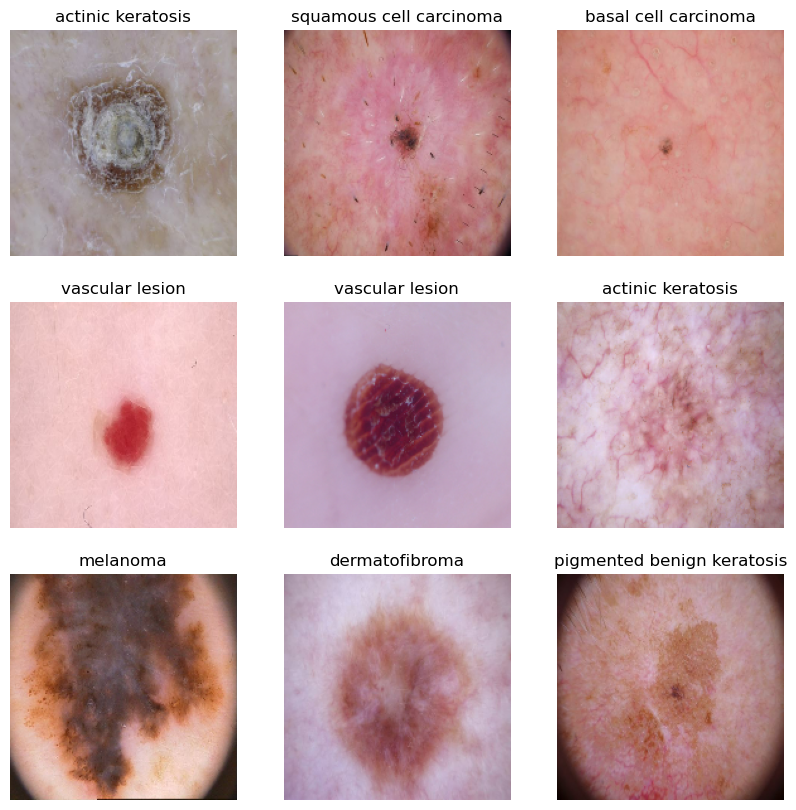

In [58]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [59]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [60]:
num_classes = len(class_names)

model = Sequential([
    keras.Input(batch_shape=(batch_size, img_height, img_width, 3)),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [61]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [62]:
# View the summary of all layers
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)         │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (32, 180, 180, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (32, 90, 90, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (32, 90, 90, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (32, 45, 45, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (32, 45, 45, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (32, 22, 22, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (32, 30976)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (32, 128)              │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (32, 9)                │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Train the model

In [63]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 30s 487ms/step - accuracy: 0.1455 - loss: 2.3562 - val_accuracy: 0.2962 - val_loss: 2.0618
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 15s 342ms/step - accuracy: 0.3082 - loss: 1.9551 - val_accuracy: 0.4068 - val_loss: 1.5837
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 280ms/step - accuracy: 0.4351 - loss: 1.5891 - val_accuracy: 0.4751 - val_loss: 1.3945
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 285ms/step - accuracy: 0.4699 - loss: 1.4226 - val_accuracy: 0.4848 - val_loss: 1.3688
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 263ms/step - accuracy: 0.5317 - loss: 1.2822 - val_accuracy: 0.6050 - val_loss: 1.1050
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 260ms/step - accuracy: 0.6026 - loss: 1.0955 - val_accuracy: 0.6110 - val_loss: 1.0597
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 12s 270ms/step - accuracy: 0.6178 - loss: 1.0255 - val_accuracy: 0.6540 - val_loss: 0.9561
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 11s 254ms/step - accuracy: 0.6900 - loss: 0.9131 - val_accu

### Visualizing training results

In [64]:
def visualize_training_result(history, epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

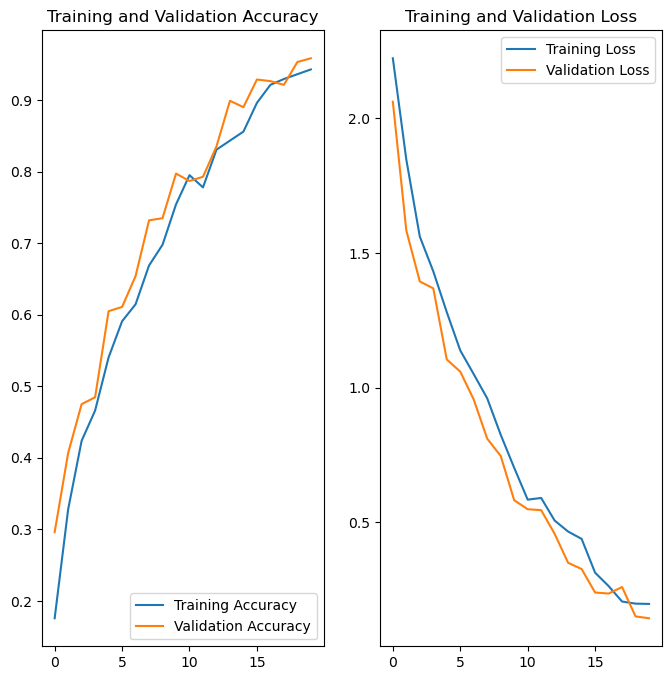

In [65]:
visualize_training_result(history, epochs)

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit
We do not see any overfitting or underfitting case here.

### Write your findings here

In [66]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# Your code goes here
# There is no edidence of oferfitting or underfitting.
# We could try adding augmentation to see if that helps in improving the acuracy

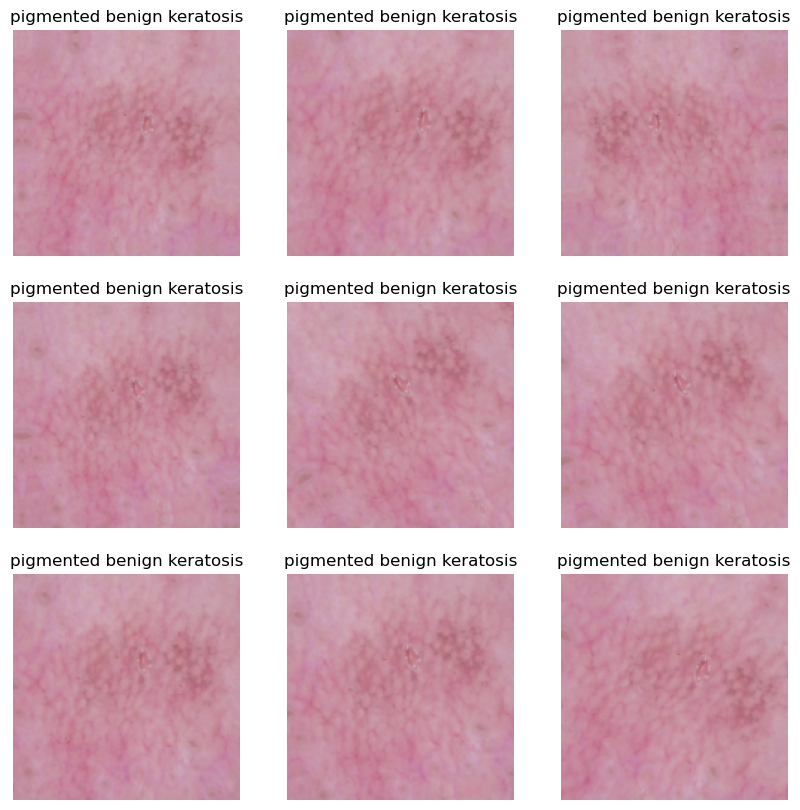

In [67]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

plt.figure(figsize=(10,10))


for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    aug_image = data_augmentation(images)
    plt.imshow(aug_image[0].numpy().astype("uint8"))
    plt.title(class_names[labels[0]])
    plt.axis("off")


### Todo:
### Create the model, compile and train the model


In [68]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

model = Sequential([
  keras.Input(batch_shape=(batch_size, img_height, img_width, 3)),
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [69]:
## Your code goes here

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [70]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_5 (Rescaling)         │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (32, 180, 180, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (32, 90, 90, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (32, 90, 90, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (32, 45, 45, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (32, 45, 45, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (32, 22, 22, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (32, 30976)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (32, 128)              │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (32, 9)                │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

### Training the model

In [71]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 27s 524ms/step - accuracy: 0.1572 - loss: 2.4307 - val_accuracy: 0.2517 - val_loss: 2.0215
Epoch 2/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 19s 455ms/step - accuracy: 0.2502 - loss: 1.9777 - val_accuracy: 0.3326 - val_loss: 1.7920
Epoch 3/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 412ms/step - accuracy: 0.3094 - loss: 1.8474 - val_accuracy: 0.3794 - val_loss: 1.6387
Epoch 4/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 18s 418ms/step - accuracy: 0.3971 - loss: 1.5996 - val_accuracy: 0.4321 - val_loss: 1.5426
Epoch 5/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 377ms/step - accuracy: 0.4251 - loss: 1.5258 - val_accuracy: 0.3653 - val_loss: 1.6778
Epoch 6/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 405ms/step - accuracy: 0.4605 - loss: 1.4766 - val_accuracy: 0.5078 - val_loss: 1.3871
Epoch 7/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 17s 406ms/step - accuracy: 0.4821 - loss: 1.3624 - val_accuracy: 0.4358 - val_loss: 1.5012
Epoch 8/20
43/43 ━━━━━━━━━━━━━━━━━━━━ 16s 372ms/step - accuracy: 0.4592 - loss: 1.4175 - val_accu

### Visualizing the results

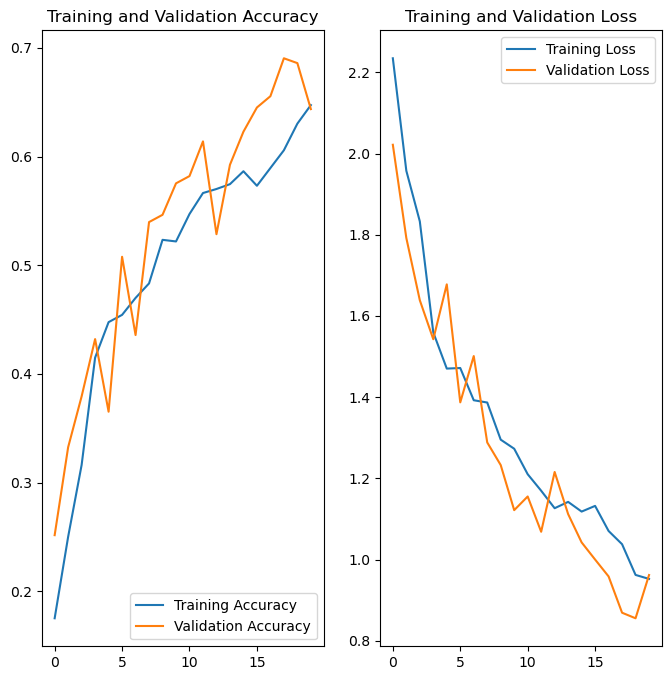

In [72]:
visualize_training_result(history, epochs)

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

overall accuracy got affected and we also started to notice increase in oerfitting behavior

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [73]:
## Your code goes here.

image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [74]:
path_list = [x for x in data_dir_train.glob(os.path.join('*','*.jpg'))]
path_list

[WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/ISIC_0025780.jpg'),
 WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/ISIC_0025803.jpg'),
 WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/ISIC_0025825.jpg'),
 WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/ISIC_0025953.jpg'),
 WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/ISIC_0025957.jpg'),
 WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/ISIC_0025992.jpg'),
 WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/ISIC_0026040.jpg'),
 WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/ISIC_0026149.jpg'),
 WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/ISIC_0026171.jpg'),
 WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/ISIC_0026194.jpg'),
 WindowsPath('CNN_assignment/Skin cancer

In [75]:
lesion_list = [os.path.basename(os.path.dirname(y)) for y in path_list]
lesion_list

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [76]:
dataframe_dict = dict(zip(path_list, lesion_list))

In [77]:
original_files = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_files.head()

,Path,Label
0,CNN_assignment\Skin cancer assignment\Train\ac...,actinic keratosis
1,CNN_assignment\Skin cancer assignment\Train\ac...,actinic keratosis
2,CNN_assignment\Skin cancer assignment\Train\ac...,actinic keratosis
3,CNN_assignment\Skin cancer assignment\Train\ac...,actinic keratosis
4,CNN_assignment\Skin cancer assignment\Train\ac...,actinic keratosis


In [78]:
original_files['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?
Data is dominoated from classes: "pigmented benign keratosis", "melanoma", "basal cell carcinoma" and "nevus"

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [79]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [80]:
# !pip install Augmentor
# path_to_training_dataset= data_dir_train
# import Augmentor
# for i in class_names:
#     p = Augmentor.Pipeline(path_to_training_dataset / i)
#     p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
#     p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [81]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [82]:
path_list = [x for x in data_dir_train.glob(os.path.join('*','output', '*.jpg'))]
path_list

[WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025780.jpg_236e5926-0e89-4a6e-b821-b462da5720d4.jpg'),
 WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025780.jpg_64c03770-6c5c-4aab-aa3c-e234fd614297.jpg'),
 WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025803.jpg_00fa680b-e420-4a61-8da2-137a9308db90.jpg'),
 WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025803.jpg_548ca8c5-da53-44ac-a58d-2266f4739d6c.jpg'),
 WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025803.jpg_5d29fe25-8c8a-4785-adca-09209d13a1d7.jpg'),
 WindowsPath('CNN_assignment/Skin cancer assignment/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0025803.jpg_694feec5-c968-46ba

In [83]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in path_list]
lesion_list_new

['actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic keratosis',
 'actinic 

In [84]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [85]:
generated_files = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
print(generated_files.head())
all_files_including_generated = pd.concat([original_files, generated_files])
print(all_files_including_generated.head())

                                                Path              Label
0  CNN_assignment\Skin cancer assignment\Train\ac...  actinic keratosis
1  CNN_assignment\Skin cancer assignment\Train\ac...  actinic keratosis
2  CNN_assignment\Skin cancer assignment\Train\ac...  actinic keratosis
3  CNN_assignment\Skin cancer assignment\Train\ac...  actinic keratosis
4  CNN_assignment\Skin cancer assignment\Train\ac...  actinic keratosis
                                                Path              Label
0  CNN_assignment\Skin cancer assignment\Train\ac...  actinic keratosis
1  CNN_assignment\Skin cancer assignment\Train\ac...  actinic keratosis
2  CNN_assignment\Skin cancer assignment\Train\ac...  actinic keratosis
3  CNN_assignment\Skin cancer assignment\Train\ac...  actinic keratosis
4  CNN_assignment\Skin cancer assignment\Train\ac...  actinic keratosis


In [86]:
all_files_including_generated['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [87]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [88]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [89]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [90]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [91]:
## your code goes here

model = Sequential([
    keras.Input(batch_shape=(batch_size, img_height, img_width, 3)),
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [92]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_6 (Rescaling)         │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (32, 180, 180, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (32, 90, 90, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (32, 90, 90, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (32, 45, 45, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (32, 45, 45, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (32, 22, 22, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (32, 30976)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (32, 128)              │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (32, 9)                │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [93]:
## your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [94]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 95s 339ms/step - accuracy: 0.2125 - loss: 2.1329 - val_accuracy: 0.4633 - val_loss: 1.4455
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 50s 294ms/step - accuracy: 0.4465 - loss: 1.4422 - val_accuracy: 0.5167 - val_loss: 1.2681
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 51s 302ms/step - accuracy: 0.5464 - loss: 1.2182 - val_accuracy: 0.5486 - val_loss: 1.2369
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 50s 297ms/step - accuracy: 0.6030 - loss: 1.0669 - val_accuracy: 0.5820 - val_loss: 1.1760
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 58s 344ms/step - accuracy: 0.6780 - loss: 0.8917 - val_accuracy: 0.6889 - val_loss: 0.8954
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 56s 330ms/step - accuracy: 0.7493 - loss: 0.6882 - val_accuracy: 0.6823 - val_loss: 0.9298
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 281ms/step - accuracy: 0.8027 - loss: 0.5512 - val_accuracy: 0.7209 - val_loss: 0.8316
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 47s 275ms/step - accuracy: 0.8183 - loss: 0

#### **Todo:**  Visualize the model results

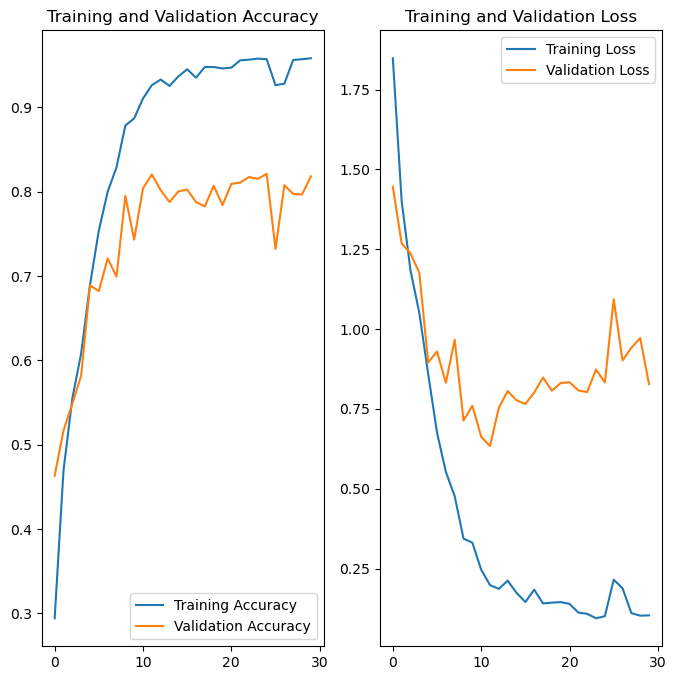

In [95]:
visualize_training_result(history, epochs)

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



After 70% accuracy we see overfit after epoch around 8.
We should try dropout

In [96]:
## your code goes here

model = Sequential([
    keras.Input(batch_shape=(batch_size, img_height, img_width, 3)),
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [97]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_7 (Rescaling)         │ (32, 180, 180, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (32, 180, 180, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (32, 90, 90, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (32, 90, 90, 32)       │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (32, 45, 45, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (32, 45, 45, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (32, 22, 22, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (32, 22, 22, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (32, 30976)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (32, 128)              │     3,965,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (32, 9)                │         1,161 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,989,801 (15.22 MB)

 Trainable params: 3,989,801 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [98]:
## your code goes here
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [99]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 61s 336ms/step - accuracy: 0.2780 - loss: 1.8431 - val_accuracy: 0.4009 - val_loss: 1.5191
Epoch 2/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 53s 311ms/step - accuracy: 0.4303 - loss: 1.5011 - val_accuracy: 0.4269 - val_loss: 1.4434
Epoch 3/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 56s 332ms/step - accuracy: 0.4587 - loss: 1.3950 - val_accuracy: 0.5226 - val_loss: 1.3210
Epoch 4/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 54s 318ms/step - accuracy: 0.5078 - loss: 1.2991 - val_accuracy: 0.5330 - val_loss: 1.2178
Epoch 5/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 53s 312ms/step - accuracy: 0.5455 - loss: 1.2036 - val_accuracy: 0.5516 - val_loss: 1.1879
Epoch 6/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 59s 352ms/step - accuracy: 0.5291 - loss: 1.2121 - val_accuracy: 0.5820 - val_loss: 1.1141
Epoch 7/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 72s 422ms/step - accuracy: 0.5711 - loss: 1.1178 - val_accuracy: 0.5360 - val_loss: 1.2567
Epoch 8/30
169/169 ━━━━━━━━━━━━━━━━━━━━ 67s 396ms/step - accuracy: 0.5909 - loss: 1

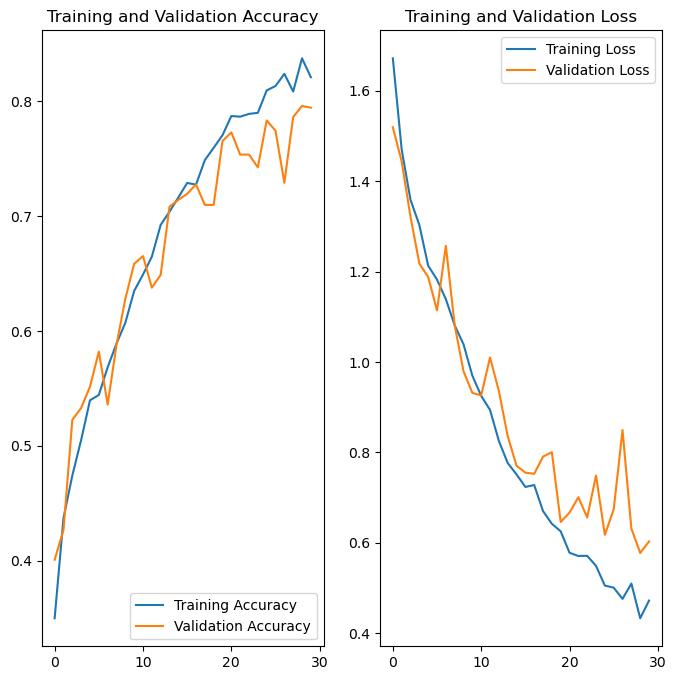

In [100]:
visualize_training_result(history, epochs)

### Conclusion
- We see lots of overfitting issue
- Reducing overfitting reduces overall accuracy
- Dropout layer is helpful in reducing the overfitting issue
- Augmentor is useful in rectifying the imbalance in class problem.